### Feature Engeening of Housing Project

#### Importing Necessary Liabries.

In [126]:
#data-manuplation
import pandas as pd
import numpy as np

#ml_tools
from sklearn.preprocessing import PowerTransformer,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,ElasticNet,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

#result_visualitation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading dataset

In [127]:
df=pd.read_csv("nepalhousing_dataset.csv")
df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,lalitpur
2,imadol,19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,lalitpur


##### FROM EDA we found the amminites has no much corelation with price so ,

In [128]:

df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,lalitpur
2,imadol,19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,lalitpur


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOCATION      2715 non-null   object 
 1   PRICE         2566 non-null   float64
 2   LAND AREA     2689 non-null   float64
 3   ROAD ACCESS   2715 non-null   int64  
 4   FACING        2643 non-null   object 
 5   FLOOR         2662 non-null   float64
 6   BEDROOM       2519 non-null   float64
 7   BATHROOM      2460 non-null   float64
 8   PROPERTY AGE  2685 non-null   float64
 9   CITY          2715 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 212.2+ KB


In [130]:
df.isnull().sum()

LOCATION          0
PRICE           149
LAND AREA        26
ROAD ACCESS       0
FACING           72
FLOOR            53
BEDROOM         196
BATHROOM        255
PROPERTY AGE     30
CITY              0
dtype: int64

In [131]:
for feature in df.columns:
    try:
        print(f"The minimun value of {feature} is :{df[feature].min()}")
    except: pass

The minimun value of LOCATION is : bafal
The minimun value of PRICE is :2680000.0
The minimun value of LAND AREA is :0.0
The minimun value of ROAD ACCESS is :0
The minimun value of FLOOR is :1.0
The minimun value of BEDROOM is :1.0
The minimun value of BATHROOM is :1.0
The minimun value of PROPERTY AGE is :1.0
The minimun value of CITY is :bhaktapur


In [132]:
df['LAND AREA']=df['LAND AREA'].replace(to_replace={0:np.nan,2.5:np.nan,4.2:np.nan,4.5:np.nan,9.25:np.nan})

### FEATURE EXTRACTION

#### SIMPLE IMPUTER

In [133]:
df['ROAD ACCESS']=df['ROAD ACCESS'].fillna(value=df['ROAD ACCESS'].median())
df['FACING']=df['FACING'].fillna(value=df['FACING'].mode()[0])
df['FLOOR']=df['FLOOR'].fillna(value=df['FLOOR'].median())
df['BEDROOM']=df['BEDROOM'].fillna(value=df['BEDROOM'].median())
df['BATHROOM']=df['BATHROOM'].fillna(value=df['BATHROOM'].median())

#### DROPNA

In [134]:
df=df.dropna()

In [135]:
df.shape

(2524, 10)

In [136]:
#df=df.drop_duplicates()

#### NUMERICAL FEATURES


In [137]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


#### CATEGORICAL FEATURES

In [138]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [139]:
df

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
0,imadol,29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,lalitpur
1,satdobato,47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,lalitpur
2,imadol,19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,lalitpur
3,bhaisepati,40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,lalitpur
4,bhaisepati,33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,lalitpur
...,...,...,...,...,...,...,...,...,...,...
2710,sitapiala,26000000.0,1540.125,16,north,2.5,4.0,4.0,5.0,kathmandu
2711,bhatbhateni,30000000.0,1540.125,16,south,3.0,3.0,3.0,5.0,kathmandu
2712,syuchatar,16000000.0,1608.575,16,south,2.5,4.0,2.0,9.0,kathmandu
2713,sano bharayang,35000000.0,2156.175,16,north-west,2.5,5.0,3.0,4.0,kathmandu


In [140]:
df.sample(5)

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY
2450,budhanilkantha,48000000.0,1197.875,12,west,2.5,7.0,7.0,2.0,kathmandu
32,bhaisepati,55000000.0,1129.425,13,south-west,2.5,4.0,4.0,6.0,lalitpur
2505,kusunti,42500000.0,1779.700,15,south-west,2.5,4.0,4.0,5.0,lalitpur
862,ichangu narayan,25000000.0,787.175,13,north-west,2.5,6.0,3.0,11.0,kathmandu
977,narayantar,53500000.0,2772.225,12,north-west,4.0,8.0,4.0,13.0,kathmandu


#### SPLITING DF INTO X AND Y
* X - are the features that are dependent
* y- is the target feature.

In [141]:
X=df.drop(columns="PRICE",axis=1)
y=df["PRICE"]

#### CHECKING SKEWNESS
* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [142]:
X.skew(numeric_only=True)

LAND AREA       10.654418
ROAD ACCESS     23.073859
FLOOR            1.649572
BEDROOM          4.494306
BATHROOM         5.780115
PROPERTY AGE     1.324051
dtype: float64

##### The features like land_area,road_acess,floor,bedroom,bathroom are screkwed so should be treated well.

#### POWER TRANSFORMATION

In [143]:
pt=PowerTransformer(method='yeo-johnson')

tranfrom_feature=["LAND AREA","ROAD ACCESS","FLOOR","BEDROOM","BATHROOM"]

X_pt=pt.fit_transform(X[tranfrom_feature])

In [144]:
X[tranfrom_feature]=pd.DataFrame(X_pt,columns=tranfrom_feature)
X[tranfrom_feature].skew() 

LAND AREA     -0.310116
ROAD ACCESS   -0.607520
FLOOR          0.017360
BEDROOM       -0.050649
BATHROOM       0.106004
dtype: float64

Text(0.5, 1.0, 'KDE plot of y after log_transf')

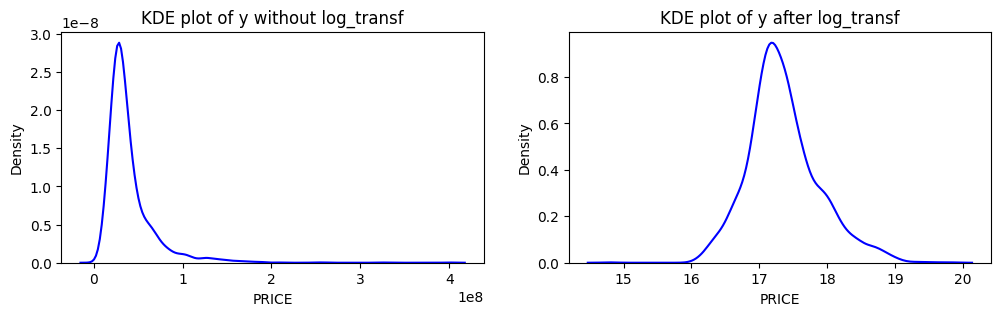

In [145]:
y_log=np.log(y+1)

fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.kdeplot(data=y,ax=ax[0],color="blue")
ax[0].set_title('KDE plot of y without log_transf')

sns.kdeplot(data=y_log,ax=ax[1],color="blue")
ax[1].set_title('KDE plot of y after log_transf')

<Axes: xlabel='FACING', ylabel='Count'>

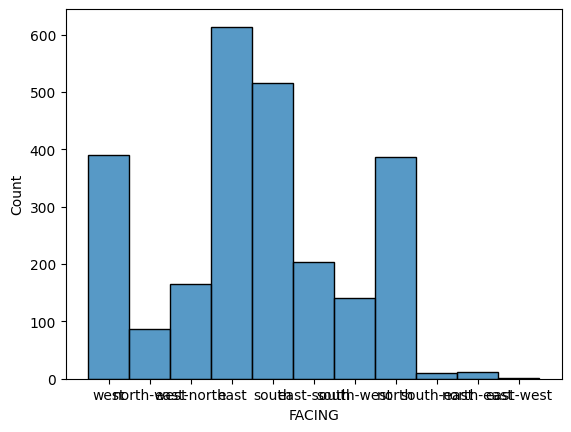

In [146]:
sns.histplot(data=X['FACING'])

In [147]:
from sklearn.preprocessing import MinMaxScaler
oe=OrdinalEncoder()
minmax=MinMaxScaler()

X_facing=oe.fit_transform(X[["FACING"]])


X_facing_copy=pd.DataFrame(X_facing)

In [148]:
#facing_maping=X["FACING"].value_counts()
#X['FACING_copy']=X["FACING"].map(facing_maping)

Text(0.5, 1.0, 'Histplot of FACING with Maping Encoding')

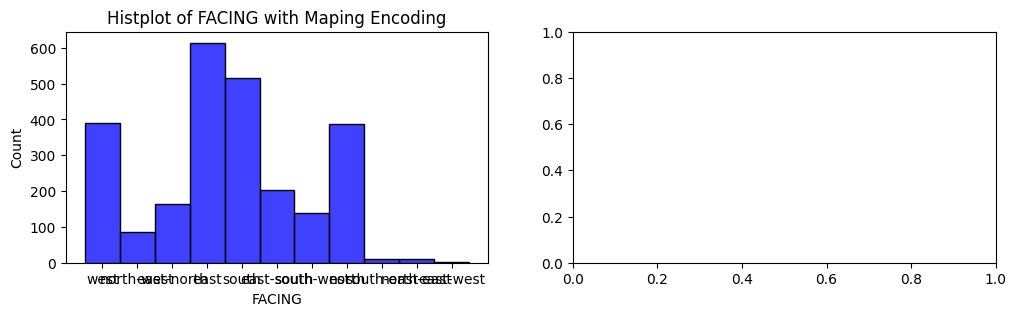

In [149]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue")
ax[0].set_title('Histplot of FACING with Maping Encoding')

#sns.histplot(data=StandardScaler().fit_transform(X[['FACING_copy']]),ax=ax[1],color="blue")
#ax[1].set_title('Histplot of FACING after Maping Encoder')

Text(0.5, 1.0, 'Histplot of FACING after OE')

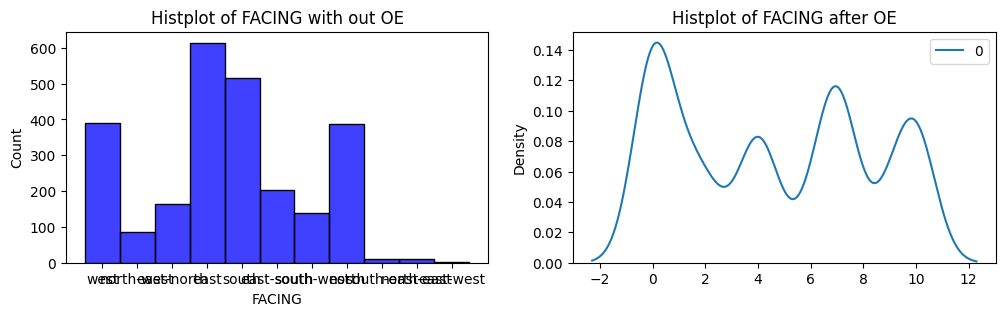

In [150]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue")
ax[0].set_title('Histplot of FACING with out OE')

sns.kdeplot(data=X_facing_copy,ax=ax[1],color="blue")
ax[1].set_title('Histplot of FACING after OE')

Text(0.5, 1.0, 'Histplot of FACING after OE')

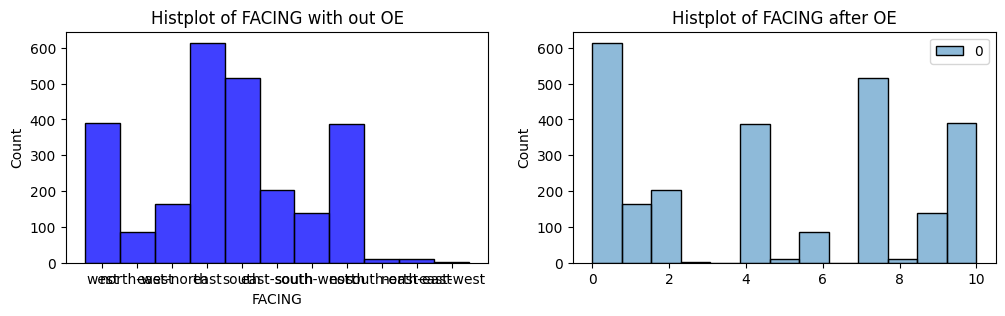

In [151]:
fig,ax=plt.subplots(1,2,figsize=(12, 3))
sns.histplot(data=X['FACING'],ax=ax[0],color="blue")
ax[0].set_title('Histplot of FACING with out OE')

sns.histplot(data=X_facing_copy,ax=ax[1],color="blue")
ax[1].set_title('Histplot of FACING after OE')



In [152]:
#ocation_maping=X["LOCATION"].value_counts()
#X['LOCATION']=X["LOCATION"].map(location_maping)

### COLUMN TRANSFORMER

In [153]:
cat_features,num_features

(['LOCATION', 'FACING', 'CITY'],
 ['PRICE',
  'LAND AREA',
  'ROAD ACCESS',
  'FLOOR',
  'BEDROOM',
  'BATHROOM',
  'PROPERTY AGE'])

In [154]:
location_labels=X["LOCATION"].value_counts().sort_values(ascending=False).head(5).index

for label in location_labels:
    X[label]=np.where(X["LOCATION"]==label,1,0)

#city_labels={"kathmandu":0,"lalitpur":-1,"bhaktapur":1}

#X["CITY"]=X['CITY'].map(city_labels)


X["FACING"]=OrdinalEncoder().fit_transform(X[["FACING"]])
X["CITY"]=OrdinalEncoder().fit_transform(X[["CITY"]])
X["LOCATION"]=OneHotEncoder(sparse_output=False).fit_transform(X[["LOCATION"]])



#X=X.drop(columns=["LOCATION"])



In [155]:
df["LOCATION"]

0                imadol
1             satdobato
2                imadol
3            bhaisepati
4            bhaisepati
             ...       
2710          sitapiala
2711        bhatbhateni
2712          syuchatar
2713     sano bharayang
2714     budhanilkantha
Name: LOCATION, Length: 2524, dtype: object

In [156]:
X["CITY"].unique()

array([2., 1., 0.])

In [157]:
X["CITY"].skew()

0.3930537433279187

In [158]:
X.skew(numeric_only=True)

LOCATION          20.449108
LAND AREA         -0.310116
ROAD ACCESS       -0.607520
FACING             0.099197
FLOOR              0.017360
BEDROOM           -0.050649
BATHROOM           0.106004
PROPERTY AGE       1.324051
CITY               0.393054
imadol             2.902639
budhanilkantha     3.684752
bhaisepati         3.886547
dhapasi            6.370950
kapan              6.970491
dtype: float64

<Axes: xlabel='CITY', ylabel='Density'>

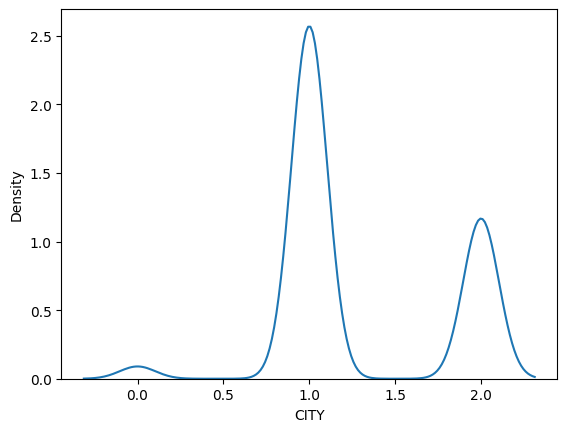

In [159]:
sns.kdeplot(data=X["CITY"])

In [160]:
X["CITY"]=StandardScaler().fit_transform(X[["CITY"]])

<Axes: xlabel='CITY', ylabel='Density'>

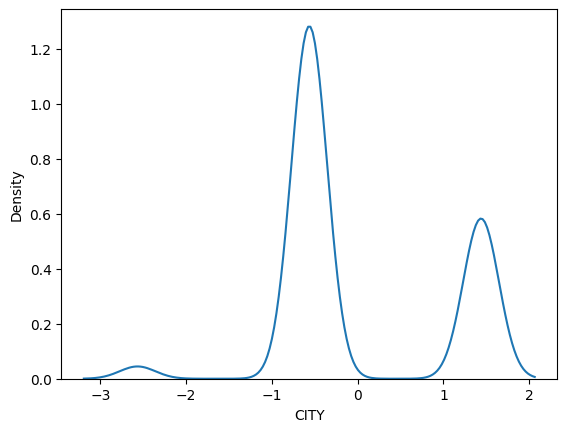

In [161]:
sns.kdeplot(data=X["CITY"])

In [162]:

from scipy.stats import skew

print("Skewness after transformation:", skew(X["CITY"]))


Skewness after transformation: 0.3928201149717105


In [163]:
X["CITY"]

0       1.439218
1       1.439218
2       1.439218
3       1.439218
4       1.439218
          ...   
2710   -0.564415
2711   -0.564415
2712   -0.564415
2713   -0.564415
2714   -0.564415
Name: CITY, Length: 2524, dtype: float64

In [164]:
from scipy.stats import skew

X["CITY"].skew()

0.393053743327919

In [176]:
X['LOCATION']=OrdinalEncoder().fit_transform(X[["LOCATION"]])
X["FACING"]=OrdinalEncoder().fit_transform(X[["FACING"]])
X["CITY"]=OneHotEncoder(sparse_output=False).fit_transform(X[["CITY"]])
X=X.drop(columns=["LOCATION"])

In [166]:
num_features.remove("PRICE")

In [167]:
X.columns=X.columns.astype(str)

#X=MinMaxScaler().fit_transform(X)




#X[num_features]=PowerTransformer(method='yeo-johnson').fit_transform(X[num_features])
#y=np.log(y+1)
#X[cat_features]=StandardScaler().fit_transform(X[cat_features])

In [168]:
X.shape

(2524, 14)

In [169]:
print(y.shape)

(2524,)


In [170]:
y

0       29000000.0
1       47500000.0
2       19900000.0
3       40000000.0
4       33000000.0
           ...    
2710    26000000.0
2711    30000000.0
2712    16000000.0
2713    35000000.0
2714    48000000.0
Name: PRICE, Length: 2524, dtype: float64

### TRAIN TEST SPLIT

In [ ]:
from sklearn.impute import SimpleImputer

In [179]:
from sklearn.pipeline import Pipeline

trns=Pipeline(steps=[
    ("powertrns",PowerTransformer(method="yeo-johnson"))
])

In [180]:
ct=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse_output=False),['LOCATION']),
    ('oe',OrdinalEncoder(),['CITY','FACING']),
    ('trans',trns,[num_features]),
],remainder='passthrough')

In [177]:
X

,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,CITY,imadol,budhanilkantha,bhaisepati,dhapasi,kapan
0,-0.131626,-0.469749,10.0,0.544747,0.009121,0.083785,5.0,1.0,1,0,0,0,0
1,-0.878624,-1.020523,10.0,2.285224,0.009121,1.279318,5.0,1.0,0,0,0,0,0
2,-1.657690,-1.020523,10.0,-0.174450,-0.643453,0.083785,21.0,1.0,1,0,0,0,0
3,1.076642,-0.469749,6.0,-0.174450,-0.643453,-0.680576,22.0,1.0,0,0,1,0,0
4,-0.702729,-0.227693,6.0,-0.174450,-0.643453,-0.680576,7.0,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,NaN,NaN,4.0,NaN,NaN,NaN,5.0,1.0,0,0,0,0,0
2711,NaN,NaN,7.0,NaN,NaN,NaN,5.0,1.0,0,0,0,0,0
2712,NaN,NaN,7.0,NaN,NaN,NaN,9.0,1.0,0,0,0,0,0
2713,NaN,NaN,6.0,NaN,NaN,NaN,4.0,1.0,0,0,0,0,0


In [171]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=43
)

In [173]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LGBMRegressor()


]

# Metrics to evaluate
accuracy_metrics = [mean_absolute_error, root_mean_squared_error, r2_score]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for metric in accuracy_metrics:
        score = metric(y_test, y_pred)
        result = {"model":model.__class__.__name__,"metric":metric.__name__,"score":score}
        print(f'The {metric.__name__} of {model.__class__.__name__} is: {score}')
    print('-----------------------------------------------------------------')
        



ValueError: could not broadcast input array from shape (3,2019) into shape (1,2019)

#### FROM THE ABOVE MODEL TEST WE ARE PICKING 3 MODEL- DecisionTree , XGBoost ,LightGB

In [265]:
from sklearn.model_selection import GridSearchCV

#### Grid Search CV for Decisiion Tree Regressor

In [ ]:
#grid search cv

param_grid = {
    'max_depth': [1,2,3,4,5,10,20,15,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error', 'poisson','friedman_mse']
}

grid_search_decision_tree=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,cv=8)

grid_search_decision_tree.fit(X_train,y_train)

print("Best Parameters:", grid_search_decision_tree.best_params_)
print("Best Score (MSE):", grid_search_decision_tree.best_score_)


KeyboardInterrupt: 

#### Hyperparameter Tuning LIGHTGB

In [106]:
lgb = LGBMRegressor(random_state=42)

# Define the parameter grid
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform Grid Search
#grid_search_lgb = GridSearchCV(estimator=lgb, param_grid=param_grid_lgb, cv=5, scoring='r2', verbose=1, n_jobs=-1)
#grid_search_lgb.fit(X_train, y_train)

# Best parameters and score
#print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
#print("Best R2 score for LightGBM:", grid_search_lgb.best_score_)

In [107]:

random_search_lgb = RandomizedSearchCV(estimator=lgb, param_distributions=param_grid_lgb, cv=5, scoring='r2', n_iter=50, random_state=43, verbose=1, n_jobs=-1)
random_search_lgb.fit(X_train, y_train)

print("Best parameters for LightGBM:", random_search_lgb.best_params_)
print("Best R2 score for LightGBM:", random_search_lgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\Project\nepalhousingproject\newenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 4040, number of used features: 10
[LightGBM] [Info] Start training from score 40675960.395545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

#### PARAMETER TUNINING XGBoost